
**Name: Sparsh Saxena** <BR>
**Registration No.: 21BCE6015** <BR>
**Slot: L57+L58** <BR>
**Lab 3 Assignment Machine Learning** <BR>
**Submitted to: Ms. R.Jothi**  

**1st Question**

Design a binary classifier for classifying the following emails as spam (1)
or ham (0). Use email.csv for training. Each column xi in the csv file represents
certain keyword used for spam prediction. The first column x0 is a bias. If xi =1
means, keyword xi is present in the email.
<br> **->** Print all the parameter values learnt after training
<br> **->** Show the accuracy on the test set.

In [ ]:
!pip install numpy

import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(pd.read_csv("email.csv"))
df['x0'] = df['x0'].apply(lambda a: 1)
df

,x0,x1,x2,x3,x4,x5,class
0,1,1,1,0,1,1,1
1,1,0,0,1,1,0,0
2,1,0,1,1,0,0,1
3,1,1,0,0,1,0,0
4,1,1,0,1,0,1,1
5,1,1,1,1,1,0,0
6,1,1,1,0,1,1,1
7,1,0,0,1,1,0,0
8,1,0,1,1,0,0,1
9,1,1,0,0,1,0,0


In [ ]:
# Own implementation of Logistic Regression

from math import exp

a = 0.1 #learning rate
t = np.zeros(len(df.columns)-1) #theta vector
# print(t)
x = df.drop("class",axis=1) #feature matrix
y = df["class"] #target feature
m = len(df) #no. of rows
epoch_1 = [] #parameters calculated for 1 epoch
epochs = 5 # for 5 epochs we are going to carry out our calculations

In [ ]:
# The part where we find new parameters for next epoch

for iter in range(epochs):
  z = np.matmul(t,np.transpose(x))
  y_pred = np.vectorize(lambda a: 1/(1+exp(-a)))(z)
  i = 0
  cols = list(df.columns)
  cols.remove("class")
  # print(cols)
  for col in cols:
    s = sum(np.multiply(np.subtract(y_pred,y),df[col]))
    t[i] = t[i]-(a/m)*s
    i+=1
  if(iter == 0):
    print("Parameters after 1 epoch: ",*t); print()

Parameters after 1 epoch:  0.0 0.0 0.01388888888888889 0.0 -0.016666666666666666 0.016666666666666666



In [ ]:
# Test Set Provided in the questions

x_test = pd.DataFrame(np.array([[1,0,1,0,0,0],
                   [1,1,1,1,0,1],
                   [1,0,1,1,0,0],
                   [1,1,0,1,0,0],
                   [1,0,1,0,0,1],
                   [1,0,0,0,1,1],
                   [1,0,1,0,1,1],
                   [1,0,0,0,0,1]]),columns=["x0","x1","x2","x3","x4","x5"])
y_test = [1,1,1,1,0,0,0,0]
print("Test Set: ")
print(x_test)
print()
print("y_test or class: ")
print(*y_test)
print()

Test Set: 
   x0  x1  x2  x3  x4  x5
0   1   0   1   0   0   0
1   1   1   1   1   0   1
2   1   0   1   1   0   0
3   1   1   0   1   0   0
4   1   0   1   0   0   1
5   1   0   0   0   1   1
6   1   0   1   0   1   1
7   1   0   0   0   0   1

y_test or class: 
1 1 1 1 0 0 0 0



In [ ]:
# Part where we predict the class values for the test set

i,total = 0,len(x_test)
predictions = []
for i in range(total):
  pow = sum(np.multiply(t,x_test.iloc[i]))
  i+=1
  prob = 1/(1+exp(-pow))
  if(prob > 0.5): predictions.append(1)
  else: predictions.append(0)

In [ ]:
# Accuracy calculation

correct = 0
for index in range(total):
  if(y_test[index] == predictions[index]): correct+=1

accuracy = correct/total


# Results for the epochs

print(f"After {epochs} epochs: ")
print()
print("Testing labels  : ",*y_test)
print()
print("Predicted labels: ",*predictions)
print()
print("Parameters: ",*t)
print()

#Accuracy after 1 epoch is 0.5 due to the fact random guessing always gives 50% accuracy in case of binary classification.
#Can be checked by inputting epochs = 1

print(f"Accuracy of the self implemented model: {accuracy}")

After 5 epochs: 

Testing labels  :  1 1 1 1 0 0 0 0

Predicted labels:  1 1 1 0 1 1 1 1

Parameters:  3.967837625674437e-05 -7.550203764149253e-05 0.068335117559771 -7.534002495499268e-05 -0.08203130419451093 0.08207082022248069

Accuracy of the self implemented model: 0.375


**2nd Question**
<br> Apply the Logistic Regression from scikit-learn library on the dataset in Question 1 and compare the results from your own implementation.

In [ ]:
# sklearn based Logistic Regression after 5 epochs (same as the previous model)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear",max_iter=5)
x = df.drop(["x0","class"],axis=1)
y = df["class"]
model.fit(x,y)


x_test = pd.DataFrame(np.array([[0,1,0,0,0],
                                [1,1,1,0,1],
                                [0,1,1,0,0],
                                [1,0,1,0,0],
                                [0,1,0,0,1],
                                [0,0,0,1,1],
                                [0,1,0,1,1],
                                [0,0,0,0,1]]),columns = ['x1','x2','x3','x4','x5'])
y_test = [1,1,1,1,0,0,0,0]


pred = model.predict(x_test)

print("After 5 epochs: \n")
print("Testing labels  : ",*y_test)
print()
print("Predicted labels: ",*pred)
print()

accuracy = accuracy_score(y_test,pred)

#Accuracy after 1 epoch is 0.5 due to the fact random guessing always gives 50% accuracy in case of binary classification.
#Hence, after 1 epoch it is same as self implementation i.e 0.5
print("Parameters: ",*model.intercept_+model.coef_)
print()
print("Accuracy of the sklearn based model after 5 epochs: ",accuracy)

After 5 epochs: 

Testing labels  :  1 1 1 1 0 0 0 0

Predicted labels:  1 1 1 0 1 1 1 1

Parameters:  [-0.00575939  1.13898447  0.00619308 -1.27044857  1.43735342]

Accuracy of the sklearn based model after 5 epochs:  0.375


**3rd Question**

Use logistic regression model to predict the risk of having heart disease using the given dataset (heart.csv).
You need to show complete pre-processing steps (identifying null or missing-values, normalization, etc.)

In [ ]:
dt = pd.read_csv("heart.csv")
dt

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Data Preprocessing**

1. Checking for missing,null and duplicated values.

In [ ]:
dt.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#Checking for missing or null values

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Checking for null values

dt.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
dt.shape

(918, 12)

In [ ]:
# Checking for duplicate values

dt.duplicated().sum()

0

2. Label Encoding for categorical data columns.

In [ ]:
# Checking for unique types of values in the columns of dataset
print("Unique values in the columns: \n")
for col in dt.drop("HeartDisease",axis=1).columns:
  print(f"{col}: {dt[col].unique()}\n")

# By observation we select the columns for label encoding
selected_cols = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
print("Hence by observation these are to be passed through label encoder: ",*selected_cols)

Unique values in the columns: 

Age: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Sex: ['M' 'F']

ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']

RestingBP: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Cholesterol: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 29

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
# Encode labels in columns selected.
for col in selected_cols:
  dt[col] = lab_enc.fit_transform(dt[col])

# Changed dataset
dt

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


3. Normalization Process

In [ ]:
dt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Normalization of data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dt = pd.DataFrame(scaler.fit_transform(dt),columns=dt.columns)


# Changed dataset
dt

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,1.000000,0.55,0.437811,0.0,0.5,0.507042,0.0,0.431818,0.5,1.0
914,0.816327,1.0,0.000000,0.72,0.320066,1.0,0.5,0.570423,0.0,0.681818,0.5,1.0
915,0.591837,1.0,0.000000,0.65,0.217247,0.0,0.5,0.387324,1.0,0.431818,0.5,1.0
916,0.591837,0.0,0.333333,0.65,0.391376,0.0,0.0,0.802817,0.0,0.295455,0.5,1.0


4. Correlation checking for dropping certain highly correlated columns.

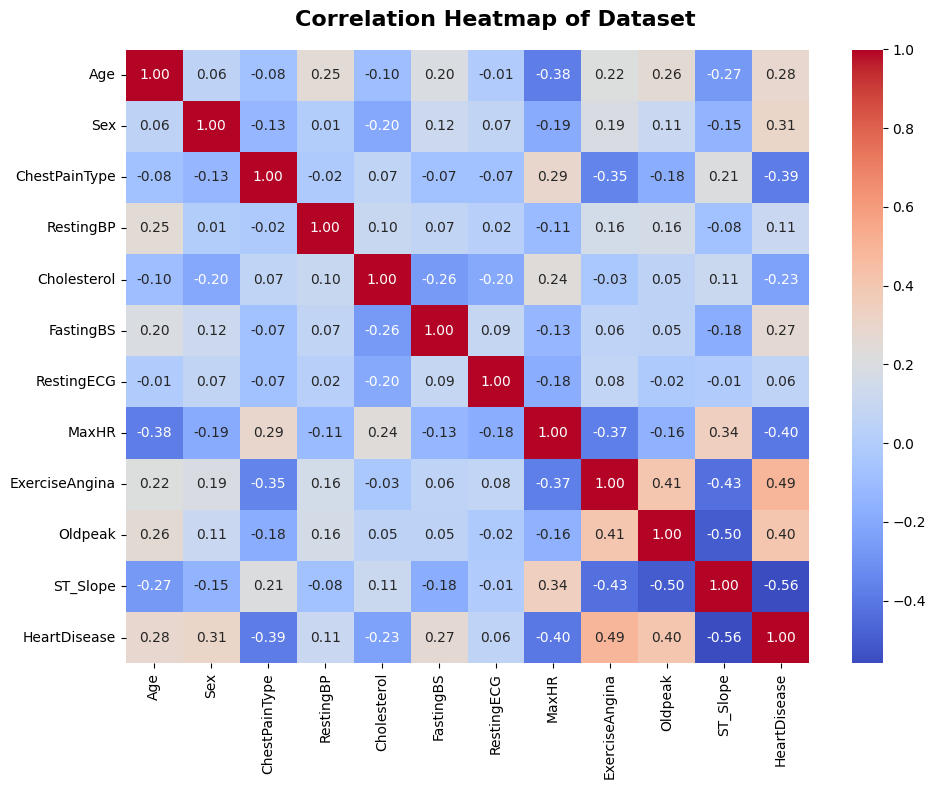

In [ ]:
# Correlation heatmap for finding out most-related columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle("Correlation Heatmap of Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# None of the columns have correlation > 0.8 so no need to drop any

**Training and Testing Dataset Separation and Model Making**

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

x = dt.drop("HeartDisease",axis=1)
y = dt["HeartDisease"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Training the model and getting test accuracy for evaluation

from sklearn.linear_model import LogisticRegression

model_heart = LogisticRegression()
model_heart.fit(x_train,y_train)

LogisticRegression()

**Evaluation**

In [ ]:
accuracy = model_heart.score(x_test,y_test)*100

print(f"Testing Accuracy for the model made for heart disease prediction: {accuracy} %")

Testing Accuracy for the model made for heart disease prediction: 84.78260869565217 %


<Axes: title={'center': 'Logistic Regression Confusion Matrix For Heart Disease Prediction Dataset'}>

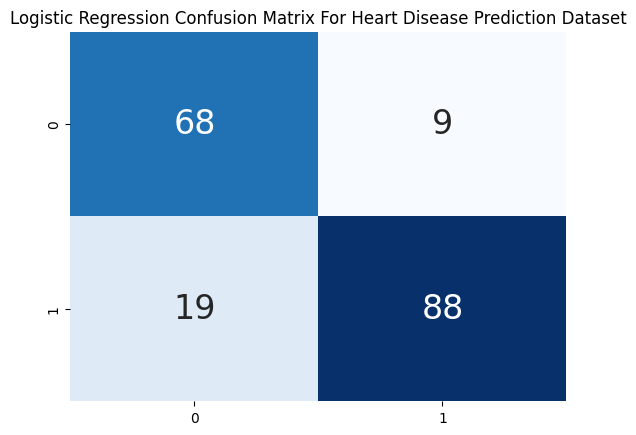

In [ ]:
from sklearn.metrics import confusion_matrix

plt.title("Logistic Regression Confusion Matrix For Heart Disease Prediction Dataset")
sns.heatmap(confusion_matrix(y_test,model_heart.predict(x_test)),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})